# 1. Get the data


In [1]:
import kagglehub
import pathlib

file = pathlib.Path(r"data/kdd/kddcup.csv")

if not file.is_file():
    path = kagglehub.dataset_download("sateeshkumar6289/cicids-2017-dataset")
    print("Path to data set files:", path)

# 1.1 Loading the datasets


In [2]:
import pandas as pd


unswnb = pd.read_csv(
    r"C:\Users\hp\RAIN Hackathon(ResponseX)\data\unswnb15\UNSW_NB15.csv"
)


print("No of rows:", len(unswnb))


unswnb.head()

No of rows: 175341


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
unswnb.drop("id", inplace=True, axis=1)

In [4]:
import os

file = pathlib.Path(r"C:\Users\hp\RAIN Hackathon(ResponseX)/data/cdic/cdic all dataset.csv")

if not file.is_file():
    file_path = r'C:\Users\hp\RAIN Hackathon(ResponseX)/data/cdic'
    cdic_all = pd.DataFrame()
    for file in os.listdir(file_path):
        day_df = pd.read_csv(rf'{file_path}/{file}')
        cdic_all = pd.concat([cdic_all, day_df], axis=0)

        # This line saves the combined dataset to a csv file, uncomment it if needed
        # cdic_all.to_csv(r'data\cdic\cdic all dataset.csv', index=False)

cdic_all = pd.read_csv(
    r"C:\Users\hp\RAIN Hackathon(ResponseX)/data/cdic/cdic all dataset.csv"
)

cdic_all.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
cdic_all.dropna(inplace=True)

In [6]:
import numpy as np



# function to shuffle the cdic_all data set and return exactly  175341 rows


def specified_rows(data, no_rows):

    np.random.seed(42)

    shuffled_indicies = np.random.permutation(len(data))

    new_indicie = int(len(data) - no_rows)

    new_df_indicie = shuffled_indicies[new_indicie:]

    return data.iloc[new_df_indicie]

In [7]:
cdic = specified_rows(cdic_all, 175341)
cdic.reset_index(inplace=True, drop=True)

In [8]:
len(cdic_all)

2829385

In [9]:
kdd = pd.read_csv(r"C:\Users\hp\RAIN Hackathon(ResponseX)/data/kdd/kddcup.csv")

print("No of rows:", len(kdd))

kdd.head()

No of rows: 4898430


,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,...,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
kdd.columns

Index(['0', 'tcp', 'http', 'SF', '215', '45076', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13',
       '0.14', '0.15', '1.1', '1.2', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '0.16', '0.17', '0.00.6', '0.00.7',
       '0.00.8', '0.00.9', '0.00.10', '0.00.11', '0.00.12', '0.00.13',
       'normal.'],
      dtype='object')

In [11]:
# Column names based on KDD dataset documentation
column_names = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "label",
]
kdd.columns = column_names

In [12]:
kdd = specified_rows(kdd, 175341)
print("New columns: ", kdd.columns)
print("No of rows:", len(kdd))
print(kdd.head())
print(kdd.isnull().sum())
kdd.reset_index(drop=True, inplace=True)

New columns:  Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')
No of rows: 175341
         duration protocol_type  service flag  src_bytes  dst_bytes  land  \
278132          0           tcp     htt

In [13]:
print("Kdd columns: ", kdd.columns)
print("Cdic colums: ", cdic.columns)
print("Unswnb: ", unswnb.columns)

Kdd columns:  Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')
Cdic colums:  Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fw

1. Standardize column names
2. Take out the common columns
3. Make it a data frame
4. remove the common data from all the other data set
5. join the the four data sets together


In [14]:
cdic_all.rename(
    columns={
        " Flow Duration": "duration",
        " Total Fwd Packets": "src_packets",
        " Total Backward Packets": "dst_packets",
        "Total Length of Fwd Packets": "src_bytes",
        " Total Length of Bwd Packets": "dst_bytes",
        " Label": "attack_label",
    },
    inplace=True,
)

In [15]:
# Standardise column names
unswnb.rename(
    columns={
        "dur": "duration",
        "proto": "protocol_type",
        "spkts": "src_packets",
        "dpkts": "dst_packets",
        "sbytes": "src_bytes",
        "dbytes": "dst_bytes",
        "label": "attack_label",
    },
    inplace=True,
)

In [16]:
# Rename columns in the KDD dataset
kdd.rename(
    columns={
        "duration": "duration",
        "protocol_type": "protocol_type",
        "src_bytes": "src_bytes",
        "dst_bytes": "dst_bytes",
        "label": "attack_label",
    },
    inplace=True,
)

In [17]:
kdd.reset_index(inplace=True, drop=True)

In [18]:
kdd.dropna(inplace=True)
unswnb.dropna(inplace=True)
cdic_all.dropna(inplace=True)

In [19]:
# Take out the common columns
common1 = unswnb[
    [
        "duration",
        "protocol_type",
        "src_packets",
        "dst_packets",
        "src_bytes",
        "dst_bytes",
        "service",
        "attack_label",
    ]
]
common2 = cdic_all[
    ["duration", "src_packets", "dst_packets", "src_bytes", "dst_bytes", "attack_label"]
]
common3 = kdd[
    ["duration", "protocol_type", "src_bytes", "dst_bytes", "service", "attack_label"]
]
general_common = pd.concat([common1, common2, common3], axis=0)
general_common

,duration,protocol_type,src_packets,dst_packets,src_bytes,dst_bytes,service,attack_label
0,0.121478,tcp,6.0,4.0,258,172,-,0
1,0.649902,tcp,14.0,38.0,734,42014,-,0
2,1.623129,tcp,8.0,16.0,364,13186,-,0
3,1.681642,tcp,12.0,12.0,628,770,ftp,0
4,0.449454,tcp,10.0,6.0,534,268,-,0
...,...,...,...,...,...,...,...,...
175336,0.000000,tcp,NaN,NaN,0,0,private,neptune.
175337,0.000000,icmp,NaN,NaN,1032,0,ecr_i,smurf.
175338,0.000000,icmp,NaN,NaN,1032,0,ecr_i,smurf.
175339,0.000000,icmp,NaN,NaN,520,0,ecr_i,smurf.


Handling missing_values


In [20]:
general_common.isnull().sum()

duration               0
protocol_type    2829385
src_packets       175341
dst_packets       175341
src_bytes              0
dst_bytes              0
service          2829385
attack_label           0
dtype: int64

In [21]:
id = general_common.isnull().any(axis=1)
general_common.loc[id]

,duration,protocol_type,src_packets,dst_packets,src_bytes,dst_bytes,service,attack_label
0,3.0,NaN,2.0,0.0,12,0,NaN,BENIGN
1,109.0,NaN,1.0,1.0,6,6,NaN,BENIGN
2,52.0,NaN,1.0,1.0,6,6,NaN,BENIGN
3,34.0,NaN,1.0,1.0,6,6,NaN,BENIGN
4,3.0,NaN,2.0,0.0,12,0,NaN,BENIGN
...,...,...,...,...,...,...,...,...
175336,0.0,tcp,NaN,NaN,0,0,private,neptune.
175337,0.0,icmp,NaN,NaN,1032,0,ecr_i,smurf.
175338,0.0,icmp,NaN,NaN,1032,0,ecr_i,smurf.
175339,0.0,icmp,NaN,NaN,520,0,ecr_i,smurf.


In [22]:
b = general_common.dropna()

In [23]:
b["attack_label"].unique()

array([0, 1], dtype=object)

In [24]:
general_common.dropna(inplace=True)

In [25]:
general_common["attack_label"].unique()

array([0, 1], dtype=object)

In [61]:
# Drop the common labels
unswnb.drop(
    [
        "duration",
        "protocol_type",
        "src_packets",
        "dst_packets",
        "src_bytes",
        "dst_bytes",
        "service",
        "attack_label",
    ],
    inplace=True,
    axis=1,
)
cdic_all.drop(
    [
        "duration",
        "src_packets",
        "dst_packets",
        "src_bytes",
        "dst_bytes",
        "attack_label",
    ],
    inplace=True,
    axis=1,
)
kdd.drop(
    ["duration", "protocol_type", "src_bytes", "dst_bytes", "service", "attack_label"],
    inplace=True,
    axis=1,
)

KeyError: "['duration', 'protocol_type', 'src_packets', 'dst_packets', 'src_bytes', 'dst_bytes', 'service', 'attack_label'] not found in axis"

In [64]:
df = pd.concat([general_common, unswnb, cdic_all, kdd], axis=1)
df_visuals = df.copy()

In [63]:
df_visuals

,duration,protocol_type,src_packets,dst_packets,src_bytes,dst_bytes,service,attack_label,state,rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.121478,tcp,6.0,4.0,258.0,172.0,-,0,FIN,74.087490,...,255.0,255.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,0.649902,tcp,14.0,38.0,734.0,42014.0,-,0,FIN,78.473372,...,255.0,255.0,1.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0
2,1.623129,tcp,8.0,16.0,364.0,13186.0,-,0,FIN,14.170161,...,255.0,1.0,0.0,0.06,0.00,0.00,1.0,1.0,0.0,0.0
3,1.681642,tcp,12.0,12.0,628.0,770.0,ftp,0,FIN,13.677108,...,19.0,255.0,1.0,0.00,0.05,0.03,0.0,0.0,0.0,0.0
4,0.449454,tcp,10.0,6.0,534.0,268.0,-,0,FIN,33.373826,...,255.0,255.0,1.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_visuals.dropna(inplace=True)

In [66]:
df_visuals

,duration,protocol_type,src_packets,dst_packets,src_bytes,dst_bytes,service,attack_label,state,rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.121478,tcp,6.0,4.0,258.0,172.0,-,0,FIN,74.087490,...,255.0,255.0,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,0.649902,tcp,14.0,38.0,734.0,42014.0,-,0,FIN,78.473372,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
2,1.623129,tcp,8.0,16.0,364.0,13186.0,-,0,FIN,14.170161,...,255.0,1.0,0.00,0.06,0.00,0.00,1.0,1.0,0.0,0.0
3,1.681642,tcp,12.0,12.0,628.0,770.0,ftp,0,FIN,13.677108,...,19.0,255.0,1.00,0.00,0.05,0.03,0.0,0.0,0.0,0.0
4,0.449454,tcp,10.0,6.0,534.0,268.0,-,0,FIN,33.373826,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,2.0,0.0,114.0,0.0,dns,1,INT,111111.107200,...,255.0,3.0,0.01,0.09,0.00,0.00,1.0,1.0,0.0,0.0
175337,0.505762,tcp,10.0,8.0,620.0,354.0,-,1,FIN,33.612649,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
175338,0.000009,udp,2.0,0.0,114.0,0.0,dns,1,INT,111111.107200,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
175339,0.000009,udp,2.0,0.0,114.0,0.0,dns,1,INT,111111.107200,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0


# 2. Discover and visualize the data


In [67]:
df_visuals.describe()

,duration,src_packets,dst_packets,src_bytes,dst_bytes,rate,sttl,dttl,sload,dload,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,175338.000000,175338.000000,175338.000000,1.753380e+05,1.753380e+05,1.753380e+05,175338.000000,175338.000000,1.753380e+05,1.753380e+05,...,175338.000000,175338.000000,175338.000000,175338.000000,175338.000000,175338.000000,175338.000000,175338.000000,175338.000000,175338.000000
mean,1.359400,20.298441,18.969345,8.844956e+03,1.492885e+04,9.540775e+04,179.548267,79.609161,7.345527e+07,6.711014e+05,...,233.293753,189.183486,0.753594,0.030778,0.605401,0.006461,0.178616,0.178453,0.057582,0.057348
std,6.480303,136.888726,110.259154,1.747671e+05,1.436554e+05,1.654020e+05,102.939516,110.506909,1.883588e+08,2.421062e+06,...,63.610908,105.980619,0.411393,0.108812,0.481092,0.042152,0.382283,0.382647,0.230338,0.230448
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278645e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,255.000000,47.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001581,2.000000,2.000000,4.270000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796455e+05,1.446705e+03,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.668065,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.783213e+04,...,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_visuals.isnull().sum().head(10)

duration         0
protocol_type    0
src_packets      0
dst_packets      0
src_bytes        0
dst_bytes        0
service          0
attack_label     0
state            0
rate             0
dtype: int64

In [69]:
df_visuals[["attack_label"]].dtypes

attack_label    object
dtype: object

In [70]:
df.dtypes

duration                       float64
protocol_type                   object
src_packets                    float64
dst_packets                    float64
src_bytes                      float64
                                ...   
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
Length: 153, dtype: object

In [71]:
IMAGE_PATH = pathlib.Path() / "images" / "national security"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGE_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)

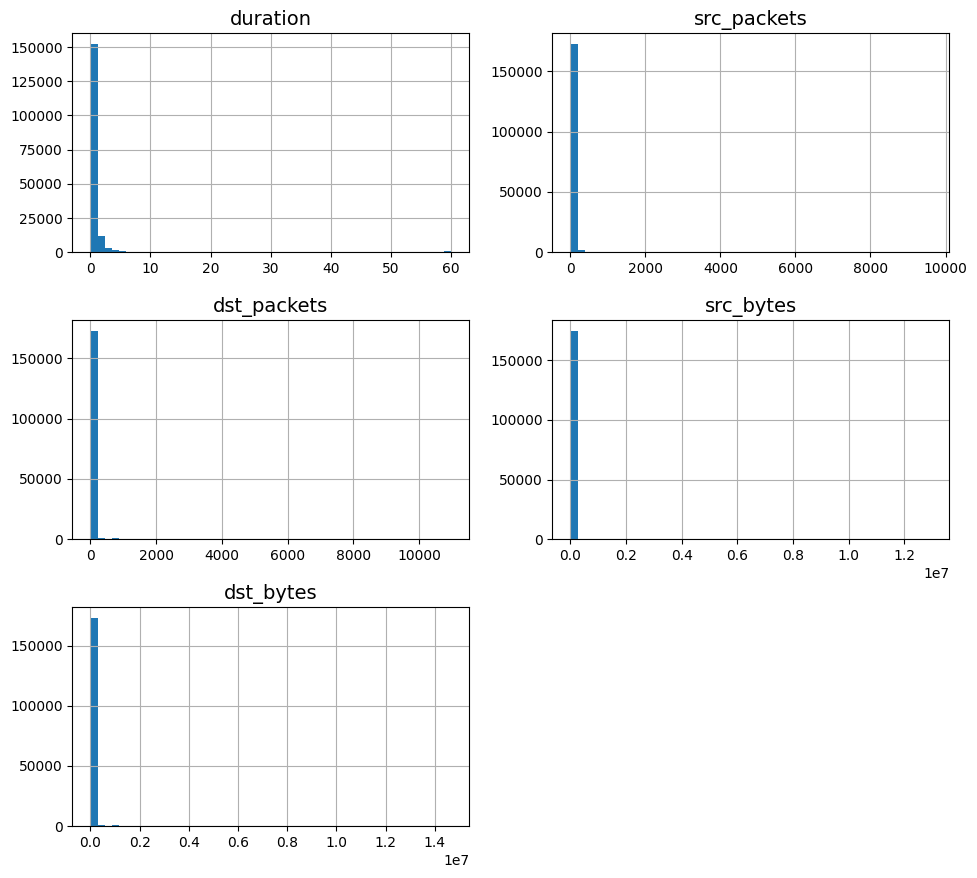

In [72]:
%matplotlib inline

import matplotlib.pyplot as plt

general_common.hist(figsize=(10, 9), bins=50)

plt.rc('font', size=14)

plt.rc('axes', labelsize=14, titlesize=14)

plt.rc('legend', fontsize=14)

plt.rc('xtick', labelsize=10)

plt.rc('ytick',  labelsize=10)

save_fig('Common Features in the dataset')

plt.show()

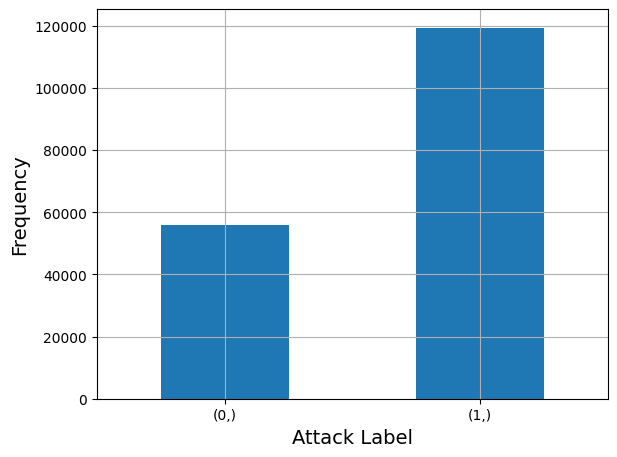

In [73]:
df_visuals[['attack_label']].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.xlabel('Attack Label', fontsize=14)

plt.ylabel('Frequency', fontsize=14)

save_fig('Attack Label')
plt.show()

In [74]:
df_visuals[["attack_label"]].dtypes

attack_label    object
dtype: object

In [75]:
df_visuals.columns

Index(['duration', 'protocol_type', 'src_packets', 'dst_packets', 'src_bytes',
       'dst_bytes', 'service', 'attack_label', 'state', 'rate',
       ...
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object', length=153)

In [76]:
df_visuals.reset_index(drop=True, inplace=True)
df_visuals

,duration,protocol_type,src_packets,dst_packets,src_bytes,dst_bytes,service,attack_label,state,rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.121478,tcp,6.0,4.0,258.0,172.0,-,0,FIN,74.087490,...,255.0,255.0,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,0.649902,tcp,14.0,38.0,734.0,42014.0,-,0,FIN,78.473372,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
2,1.623129,tcp,8.0,16.0,364.0,13186.0,-,0,FIN,14.170161,...,255.0,1.0,0.00,0.06,0.00,0.00,1.0,1.0,0.0,0.0
3,1.681642,tcp,12.0,12.0,628.0,770.0,ftp,0,FIN,13.677108,...,19.0,255.0,1.00,0.00,0.05,0.03,0.0,0.0,0.0,0.0
4,0.449454,tcp,10.0,6.0,534.0,268.0,-,0,FIN,33.373826,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175333,0.000009,udp,2.0,0.0,114.0,0.0,dns,1,INT,111111.107200,...,255.0,3.0,0.01,0.09,0.00,0.00,1.0,1.0,0.0,0.0
175334,0.505762,tcp,10.0,8.0,620.0,354.0,-,1,FIN,33.612649,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
175335,0.000009,udp,2.0,0.0,114.0,0.0,dns,1,INT,111111.107200,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
175336,0.000009,udp,2.0,0.0,114.0,0.0,dns,1,INT,111111.107200,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0


# 2.1 Checking Correlations


In [77]:
df_visuals["attack_label"].dtypes

dtype('O')

In [78]:
id_null = df_visuals.isnull().any(axis=1)
df_visuals.loc[id_null]

,duration,protocol_type,src_packets,dst_packets,src_bytes,dst_bytes,service,attack_label,state,rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate


In [79]:
df_visuals["attack_label"].unique()

array([0, 1], dtype=object)

In [80]:
df_visuals["attack_label"] = pd.to_numeric(df_visuals["attack_label"], errors="coerce")

# Confirm the data type conversion
print(df_visuals["attack_label"].dtypes)

int64


In [81]:
# Checking for nan values
id_null = df_visuals.isnull().any(axis=1)
df_visuals.loc[id_null]

,duration,protocol_type,src_packets,dst_packets,src_bytes,dst_bytes,service,attack_label,state,rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate


In [82]:
numerical_df = df_visuals.select_dtypes(include=["int64", "float64"])
corr_matrix = numerical_df.corr()

In [83]:
corr_matrix

,duration,src_packets,dst_packets,src_bytes,dst_bytes,attack_label,rate,sttl,dttl,sload,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.254560,0.181183,0.199731,0.144134,0.036173,-0.120968,0.012192,0.044157,-0.081750,...,0.002230,0.000114,-0.000725,-0.000569,0.000789,-0.001467,0.000202,0.000210,-0.000132,-0.000142
src_packets,0.254560,1.000000,0.390067,0.963791,0.206608,-0.052177,-0.076358,-0.102721,0.068248,-0.051645,...,-0.001403,0.000927,0.000938,0.001281,-0.000906,0.003687,-0.001324,-0.001277,0.000558,0.000588
dst_packets,0.181183,0.390067,1.000000,0.188476,0.971907,-0.118590,-0.098201,-0.192578,0.053863,-0.066709,...,0.001843,-0.005488,-0.006095,0.004397,-0.004923,-0.002228,0.004662,0.004733,0.002425,0.002445
src_bytes,0.199731,0.963791,0.188476,1.000000,0.009926,0.018575,-0.028468,-0.020861,0.063009,-0.018323,...,-0.001268,0.002364,0.002463,-0.000024,0.000516,0.004393,-0.002115,-0.002096,-0.000487,-0.000424
dst_bytes,0.144134,0.206608,0.971907,0.009926,1.000000,-0.076872,-0.059475,-0.135515,0.023560,-0.040430,...,0.002361,-0.005680,-0.006376,0.004484,-0.004714,-0.003230,0.004721,0.004784,0.002620,0.002715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dst_host_srv_diff_host_rate,-0.001467,0.003687,-0.002228,0.004393,-0.003230,-0.000826,0.000302,0.001245,-0.000829,-0.000744,...,-0.479479,-0.011932,0.048819,0.020668,-0.074578,1.000000,-0.070663,-0.070583,0.143699,0.142844
dst_host_serror_rate,0.000202,-0.001324,0.004662,-0.002115,0.004721,-0.003557,0.003247,-0.002470,0.000610,0.004205,...,0.155440,-0.783736,-0.804810,0.159890,-0.586673,-0.070663,1.000000,0.998205,-0.113551,-0.112877
dst_host_srv_serror_rate,0.000210,-0.001277,0.004733,-0.002096,0.004784,-0.003443,0.003124,-0.002532,0.000771,0.004086,...,0.155819,-0.782813,-0.803827,0.160762,-0.585702,-0.070583,0.998205,1.000000,-0.112686,-0.115928
dst_host_rerror_rate,-0.000132,0.000558,0.002425,-0.000487,0.002620,0.000427,0.000783,0.000654,-0.001109,-0.001997,...,-0.094431,-0.333961,-0.323999,0.222157,-0.268429,0.143699,-0.113551,-0.112686,1.000000,0.986720


In [84]:
corr_matrix["attack_label"].sort_values(ascending=True)

dload               -0.393728
dmean               -0.341797
swin                -0.333616
dwin                -0.319607
stcpb               -0.255001
                       ...   
Bwd Avg Bulk Rate         NaN
land                      NaN
urgent                    NaN
num_outbound_cmds         NaN
is_host_login             NaN
Name: attack_label, Length: 148, dtype: float64

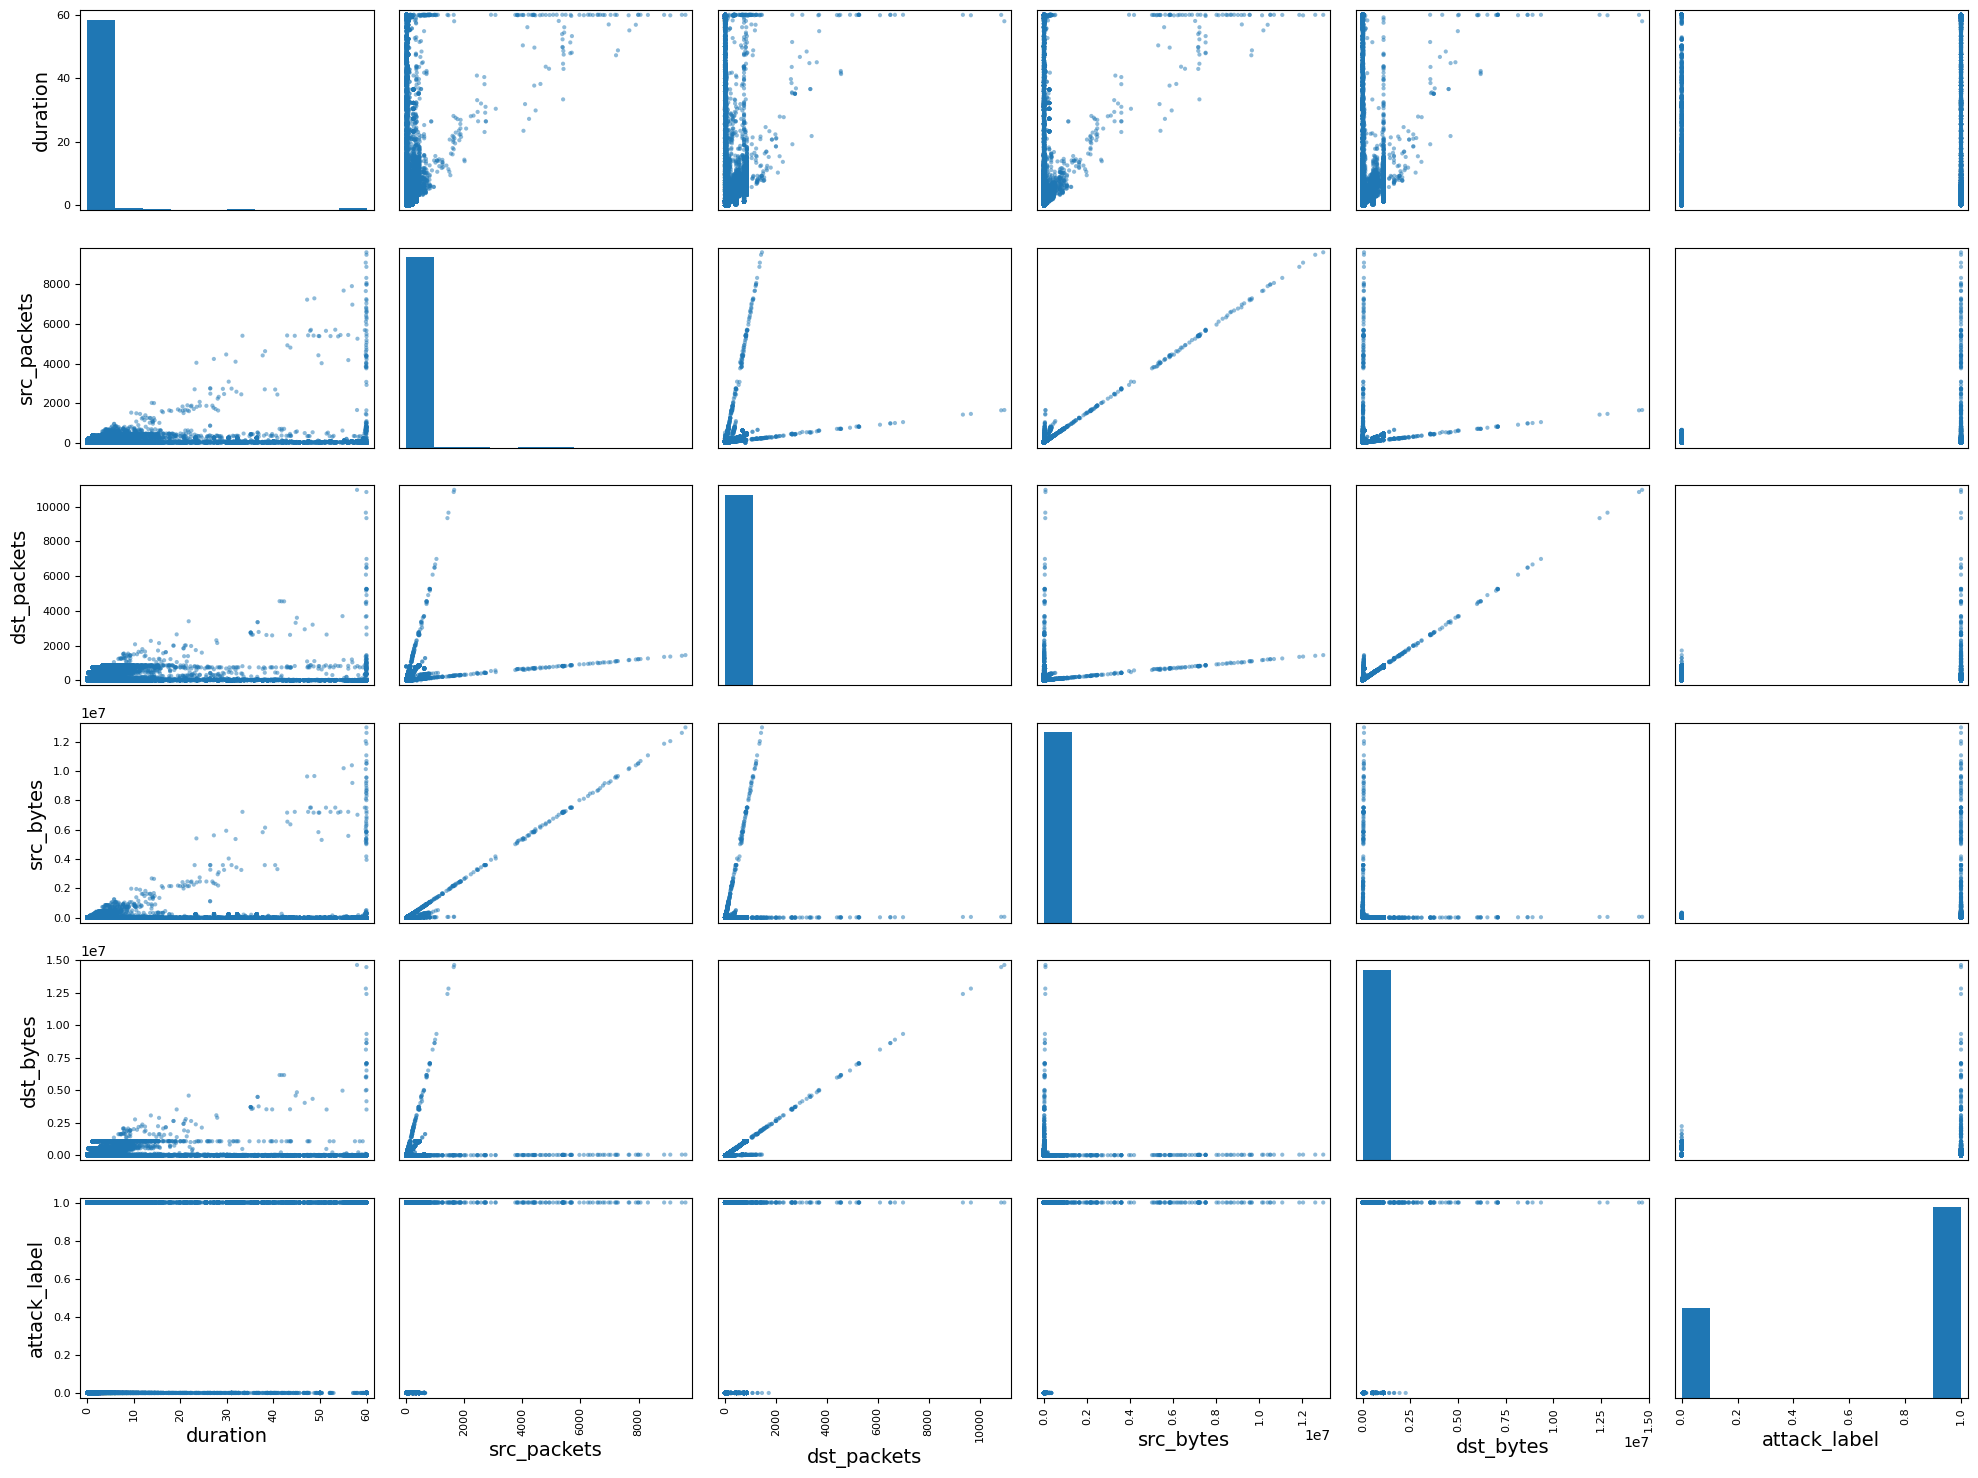

In [85]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_visuals[['duration', 'protocol_type', 'src_packets', 'dst_packets', 'src_bytes', 'dst_bytes', 'attack_label']], figsize=(20, 15))
save_fig('scatter matrix plot of common data')
plt.show()

In [86]:
corr_matrix["attack_label"].sort_values(ascending=False)

attack_label         1.000000
sttl                 0.692745
ct_state_ttl         0.577695
ct_dst_sport_ltm     0.357207
rate                 0.337972
                       ...   
Bwd Avg Bulk Rate         NaN
land                      NaN
urgent                    NaN
num_outbound_cmds         NaN
is_host_login             NaN
Name: attack_label, Length: 148, dtype: float64

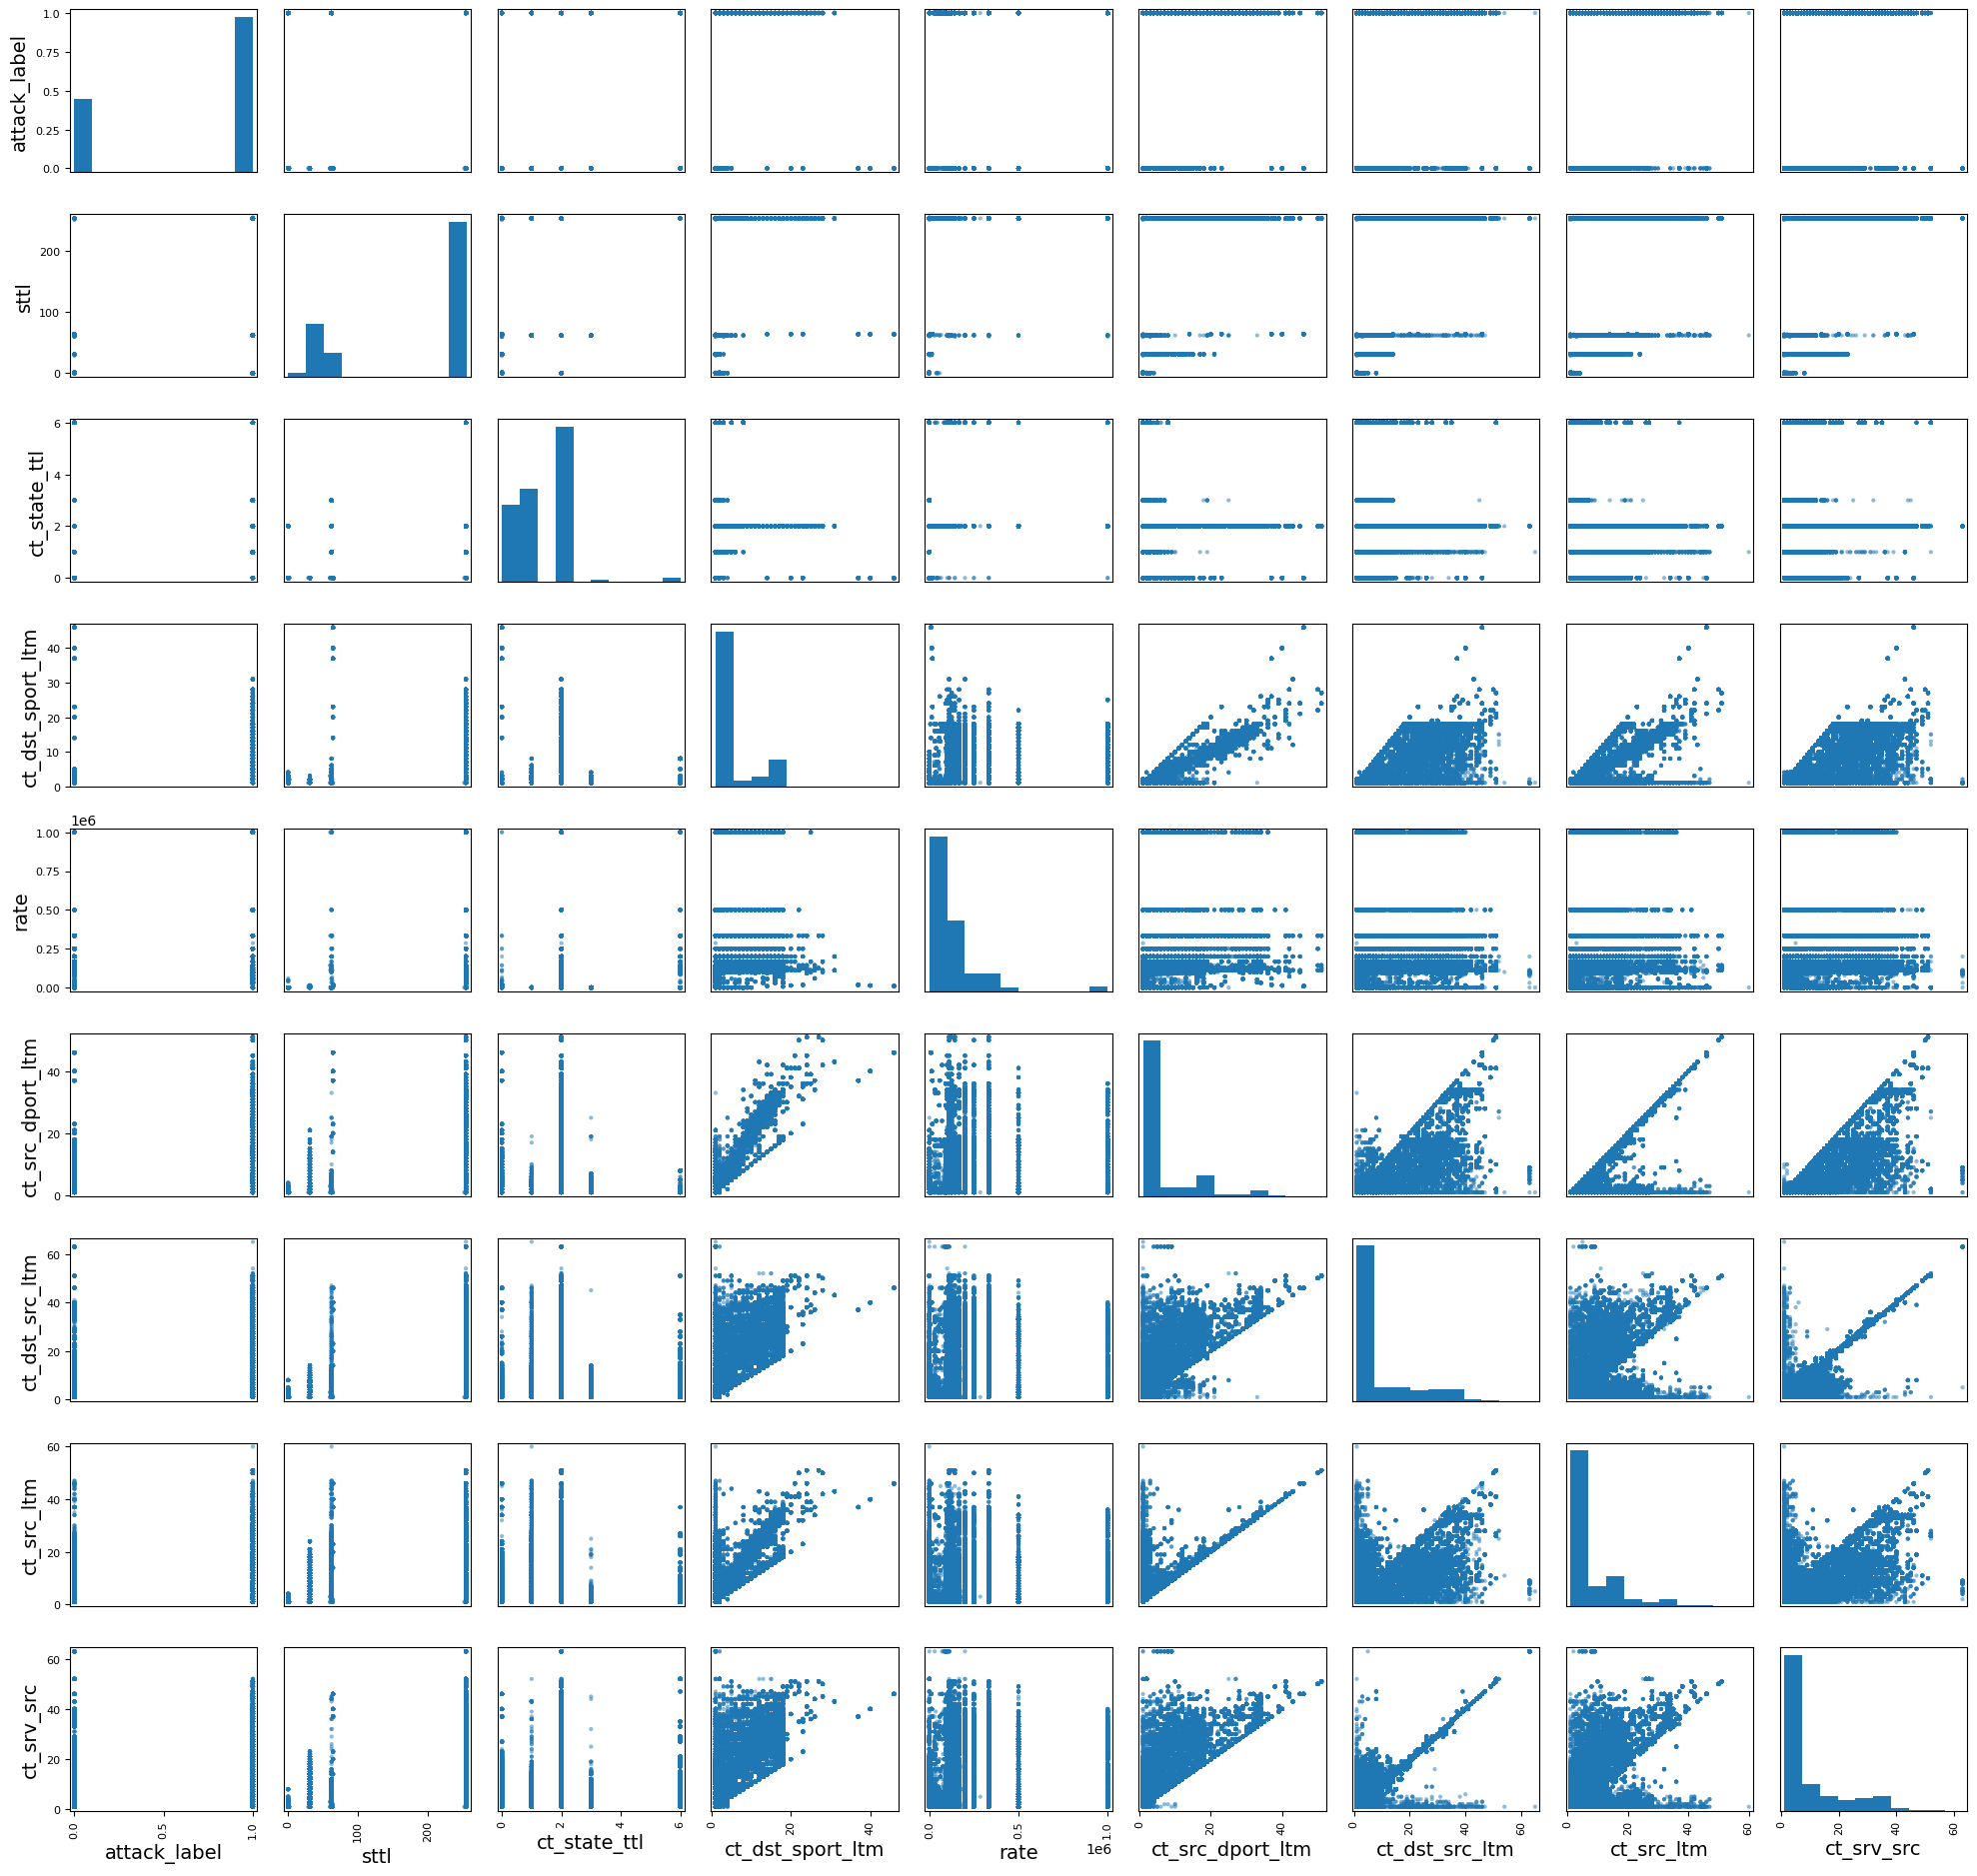

In [87]:
scatter_matrix(df_visuals[['attack_label', 'sttl', 'ct_state_ttl', 'ct_dst_sport_ltm', 'rate', 'ct_src_dport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_src']], figsize=(20, 19))
save_fig('scatter plot of correlation with attack label')
plt.show()

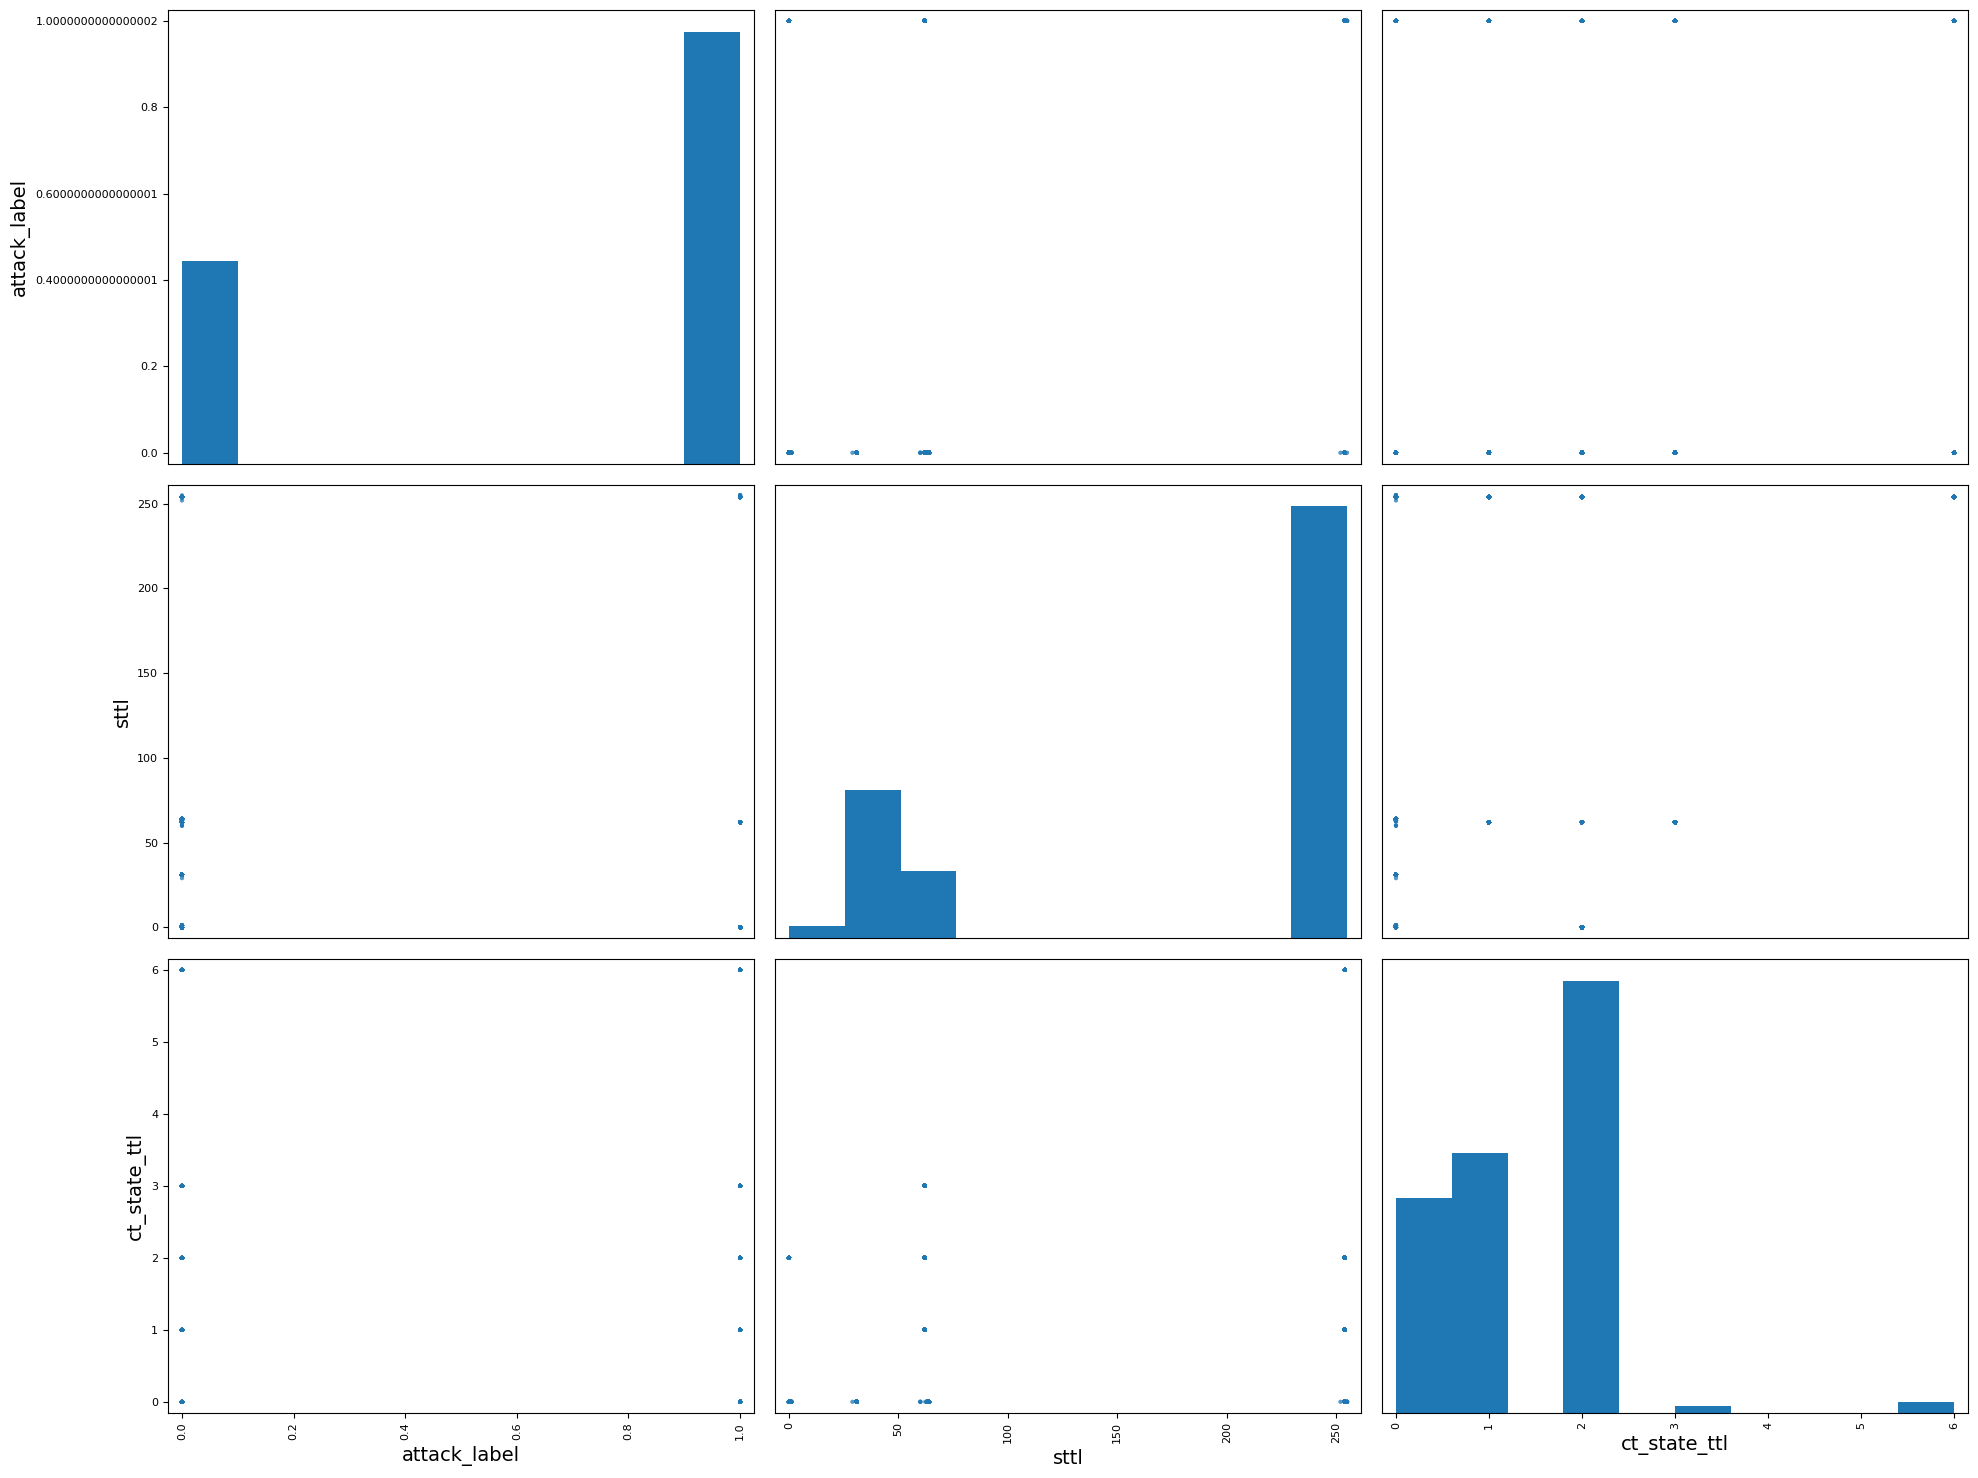

In [88]:
scatter_matrix(df_visuals[['attack_label', 'sttl', 'ct_state_ttl',]], figsize=(20,  15))
save_fig('scatter plot of high correlation with attack label')
plt.show()

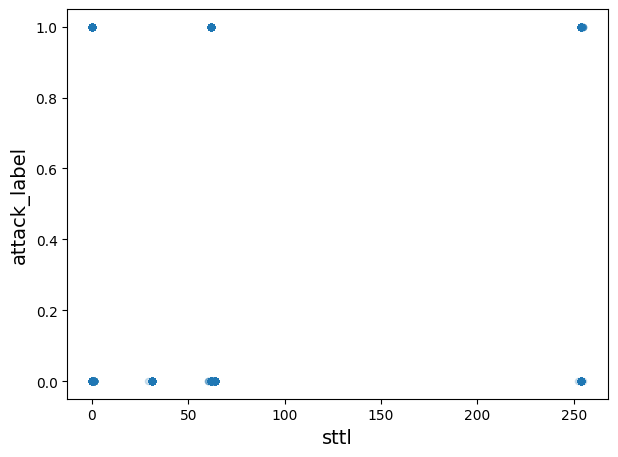

In [89]:
df_visuals.plot(kind='scatter', x='sttl', y='attack_label', legend=True, alpha=0.1)
save_fig('Attack label against id')
plt.show()

# 2.2 Engineering new features


In [90]:
df_visuals.columns = df_visuals.columns.str.strip()

In [91]:
# Calculate Ratios and Differences Between Features
df_visuals["load_ratio"] = df_visuals["sload"] / (df_visuals["dload"] + 1)
df_visuals["load_diff"] = df_visuals["sload"] - df_visuals["dload"]

# Interaction Features
df_visuals["ttl_interaction"] = (
    df_visuals["sttl"] * df_visuals["ct_state_ttl"] * df_visuals["ct_dst_sport_ltm"]
)
df_visuals["ct_interaction"] = (
    df_visuals["ct_dst_src_ltm"] * df_visuals["ct_src_dport_ltm"]
)

# # Inter-arrival Time (IAT) Features
df_visuals["iat_mean"] = df_visuals[
    ["Fwd IAT Std", "Flow IAT Std", "Bwd IAT Std"]
].mean(axis=1)
df_visuals["iat_std"] = df_visuals[["Fwd IAT Std", "Flow IAT Std", "Bwd IAT Std"]].std(
    axis=1
)

# Derived Flags or Binary Features
df_visuals["combined_flag_count"] = (
    df_visuals["FIN Flag Count"]
    + df_visuals["SYN Flag Count"]
    + df_visuals["RST Flag Count"]
)

# Domain-Specific Ratios
df_visuals["bwd_fwd_ratio"] = df_visuals["Bwd Packet Length Mean"] / (
    df_visuals["Fwd Packet Length Mean"] + 1
)

# Flow-based Ratios
df_visuals["flow_packets_bytes_ratio"] = df_visuals["Flow Packets/s"] / (
    df_visuals["Flow Bytes/s"] + 1
)

# Rolling Means/STD of Packet and Byte Features
df_visuals["rolling_mean_fwd_bytes"] = (
    df_visuals["Fwd Packet Length Mean"].rolling(window=5).mean()
)
df_visuals["rolling_std_fwd_bytes"] = (
    df_visuals["Fwd Packet Length Std"].rolling(window=5).std()
)

# # Target Encoding or Binning
df_visuals["sttl_binned"] = pd.qcut(
    df_visuals["sttl"], q=5, labels=False, duplicates="drop"
)

# # Feature Crossings
df_visuals["sttl_ct_state_cross"] = (
    df_visuals["sttl"].astype(str) + "_" + df_visuals["ct_state_ttl"].astype(str)
)

In [92]:
numerical_df = df_visuals.select_dtypes(include=["int64", "float64"])
corr_matrix = numerical_df.corr()
corr_matrix

,duration,src_packets,dst_packets,src_bytes,dst_bytes,attack_label,rate,sttl,dttl,sload,...,ttl_interaction,ct_interaction,iat_mean,iat_std,combined_flag_count,bwd_fwd_ratio,flow_packets_bytes_ratio,rolling_mean_fwd_bytes,rolling_std_fwd_bytes,sttl_binned
duration,1.000000,0.254560,0.181183,0.199731,0.144134,0.036173,-0.120968,0.012192,0.044157,-0.081750,...,-0.058054,-0.086674,0.007568,0.004431,-0.001769,0.002437,-0.002432,0.008376,0.004014,0.038338
src_packets,0.254560,1.000000,0.390067,0.963791,0.206608,-0.052177,-0.076358,-0.102721,0.068248,-0.051645,...,-0.077105,-0.057557,-0.008729,-0.009288,0.003279,-0.009649,0.001827,-0.004763,-0.002426,-0.068659
dst_packets,0.181183,0.390067,1.000000,0.188476,0.971907,-0.118590,-0.098201,-0.192578,0.053863,-0.066709,...,-0.104844,-0.073661,-0.021330,-0.021461,0.003934,-0.016537,0.002976,-0.015603,-0.010255,-0.149322
src_bytes,0.199731,0.963791,0.188476,1.000000,0.009926,0.018575,-0.028468,-0.020861,0.063009,-0.018323,...,-0.028899,-0.021762,0.003062,0.002709,0.002078,-0.000289,-0.000434,0.005159,0.004982,0.015773
dst_bytes,0.144134,0.206608,0.971907,0.009926,1.000000,-0.076872,-0.059475,-0.135515,0.023560,-0.040430,...,-0.063876,-0.044386,-0.014388,-0.014013,0.002881,-0.009511,0.001489,-0.010823,-0.007354,-0.100874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bwd_fwd_ratio,0.002437,-0.009649,-0.016537,-0.000289,-0.009511,0.123500,0.040859,0.107422,0.030855,0.033471,...,0.024162,0.011396,0.157651,0.334960,-0.151245,1.000000,-0.029606,-0.282847,-0.251680,0.133949
flow_packets_bytes_ratio,-0.002432,0.001827,0.002976,-0.000434,0.001489,-0.027032,-0.008334,-0.021315,-0.005772,-0.006835,...,-0.013801,-0.008135,-0.019543,-0.020283,-0.006382,-0.029606,1.000000,-0.009274,-0.005139,-0.026355
rolling_mean_fwd_bytes,0.008376,-0.004763,-0.015603,0.005159,-0.010823,0.097198,0.030982,0.086098,0.029826,0.021663,...,0.042187,0.030088,0.461800,0.121856,0.239030,-0.282847,-0.009274,1.000000,0.788673,0.100181
rolling_std_fwd_bytes,0.004014,-0.002426,-0.010255,0.004982,-0.007354,0.068007,0.019383,0.062334,0.023720,0.016028,...,0.025525,0.018899,0.314961,0.065167,0.129309,-0.251680,-0.005139,0.788673,1.000000,0.071771


In [93]:
corr_matrix["attack_label"].sort_values(ascending=False)

attack_label         1.000000
sttl_binned          0.819245
sttl                 0.692745
ct_state_ttl         0.577695
ttl_interaction      0.406407
                       ...   
Bwd Avg Bulk Rate         NaN
land                      NaN
urgent                    NaN
num_outbound_cmds         NaN
is_host_login             NaN
Name: attack_label, Length: 160, dtype: float64

In [94]:
df_visuals[
    [
        "attack_label",
        "load_ratio",
        "load_diff",
        "ttl_interaction",
        "ct_dst_sport_ltm",
        "ct_interaction",
        "ct_src_dport_ltm",
        "iat_mean",
        "iat_std",
        "combined_flag_count",
        "bwd_fwd_ratio",
        "flow_packets_bytes_ratio",
        "rolling_std_fwd_bytes",
        "rolling_mean_fwd_bytes",
    ]
].corr().sort_values(by="attack_label", ascending=False)

,attack_label,load_ratio,load_diff,ttl_interaction,ct_dst_sport_ltm,ct_interaction,ct_src_dport_ltm,iat_mean,iat_std,combined_flag_count,bwd_fwd_ratio,flow_packets_bytes_ratio,rolling_std_fwd_bytes,rolling_mean_fwd_bytes
attack_label,1.000000,0.184522,0.187653,0.406407,0.357207,0.265945,0.305571,0.127452,0.131251,-0.010359,0.123500,-0.027032,0.068007,0.097198
ttl_interaction,0.406407,0.109907,0.111219,1.000000,0.972829,0.793727,0.889038,0.051244,0.056459,-0.018515,0.024162,-0.013801,0.025525,0.042187
ct_dst_sport_ltm,0.357207,0.083138,0.084309,0.972829,1.000000,0.819418,0.906793,0.044595,0.049428,-0.017118,0.018090,-0.012190,0.022659,0.037927
ct_src_dport_ltm,0.305571,0.100738,0.101813,0.889038,0.906793,0.956156,1.000000,0.037922,0.041139,-0.014178,0.009124,-0.010152,0.021560,0.034464
ct_interaction,0.265945,0.084967,0.085860,0.793727,0.819418,1.000000,0.956156,0.033324,0.035825,-0.012241,0.011396,-0.008135,0.018899,0.030088
load_diff,0.187653,0.999922,1.000000,0.111219,0.084309,0.085860,0.101813,0.035197,0.035957,-0.007108,0.034238,-0.006966,0.016512,0.022341
load_ratio,0.184522,1.000000,0.999922,0.109907,0.083138,0.084967,0.100738,0.034731,0.035475,-0.007081,0.033790,-0.006889,0.016193,0.021910
iat_std,0.131251,0.035475,0.035957,0.056459,0.049428,0.035825,0.041139,0.860178,1.000000,-0.001744,0.334960,-0.020283,0.065167,0.121856
iat_mean,0.127452,0.034731,0.035197,0.051244,0.044595,0.033324,0.037922,1.000000,0.860178,0.066903,0.157651,-0.019543,0.314961,0.461800
bwd_fwd_ratio,0.123500,0.033790,0.034238,0.024162,0.018090,0.011396,0.009124,0.157651,0.334960,-0.151245,1.000000,-0.029606,-0.251680,-0.282847


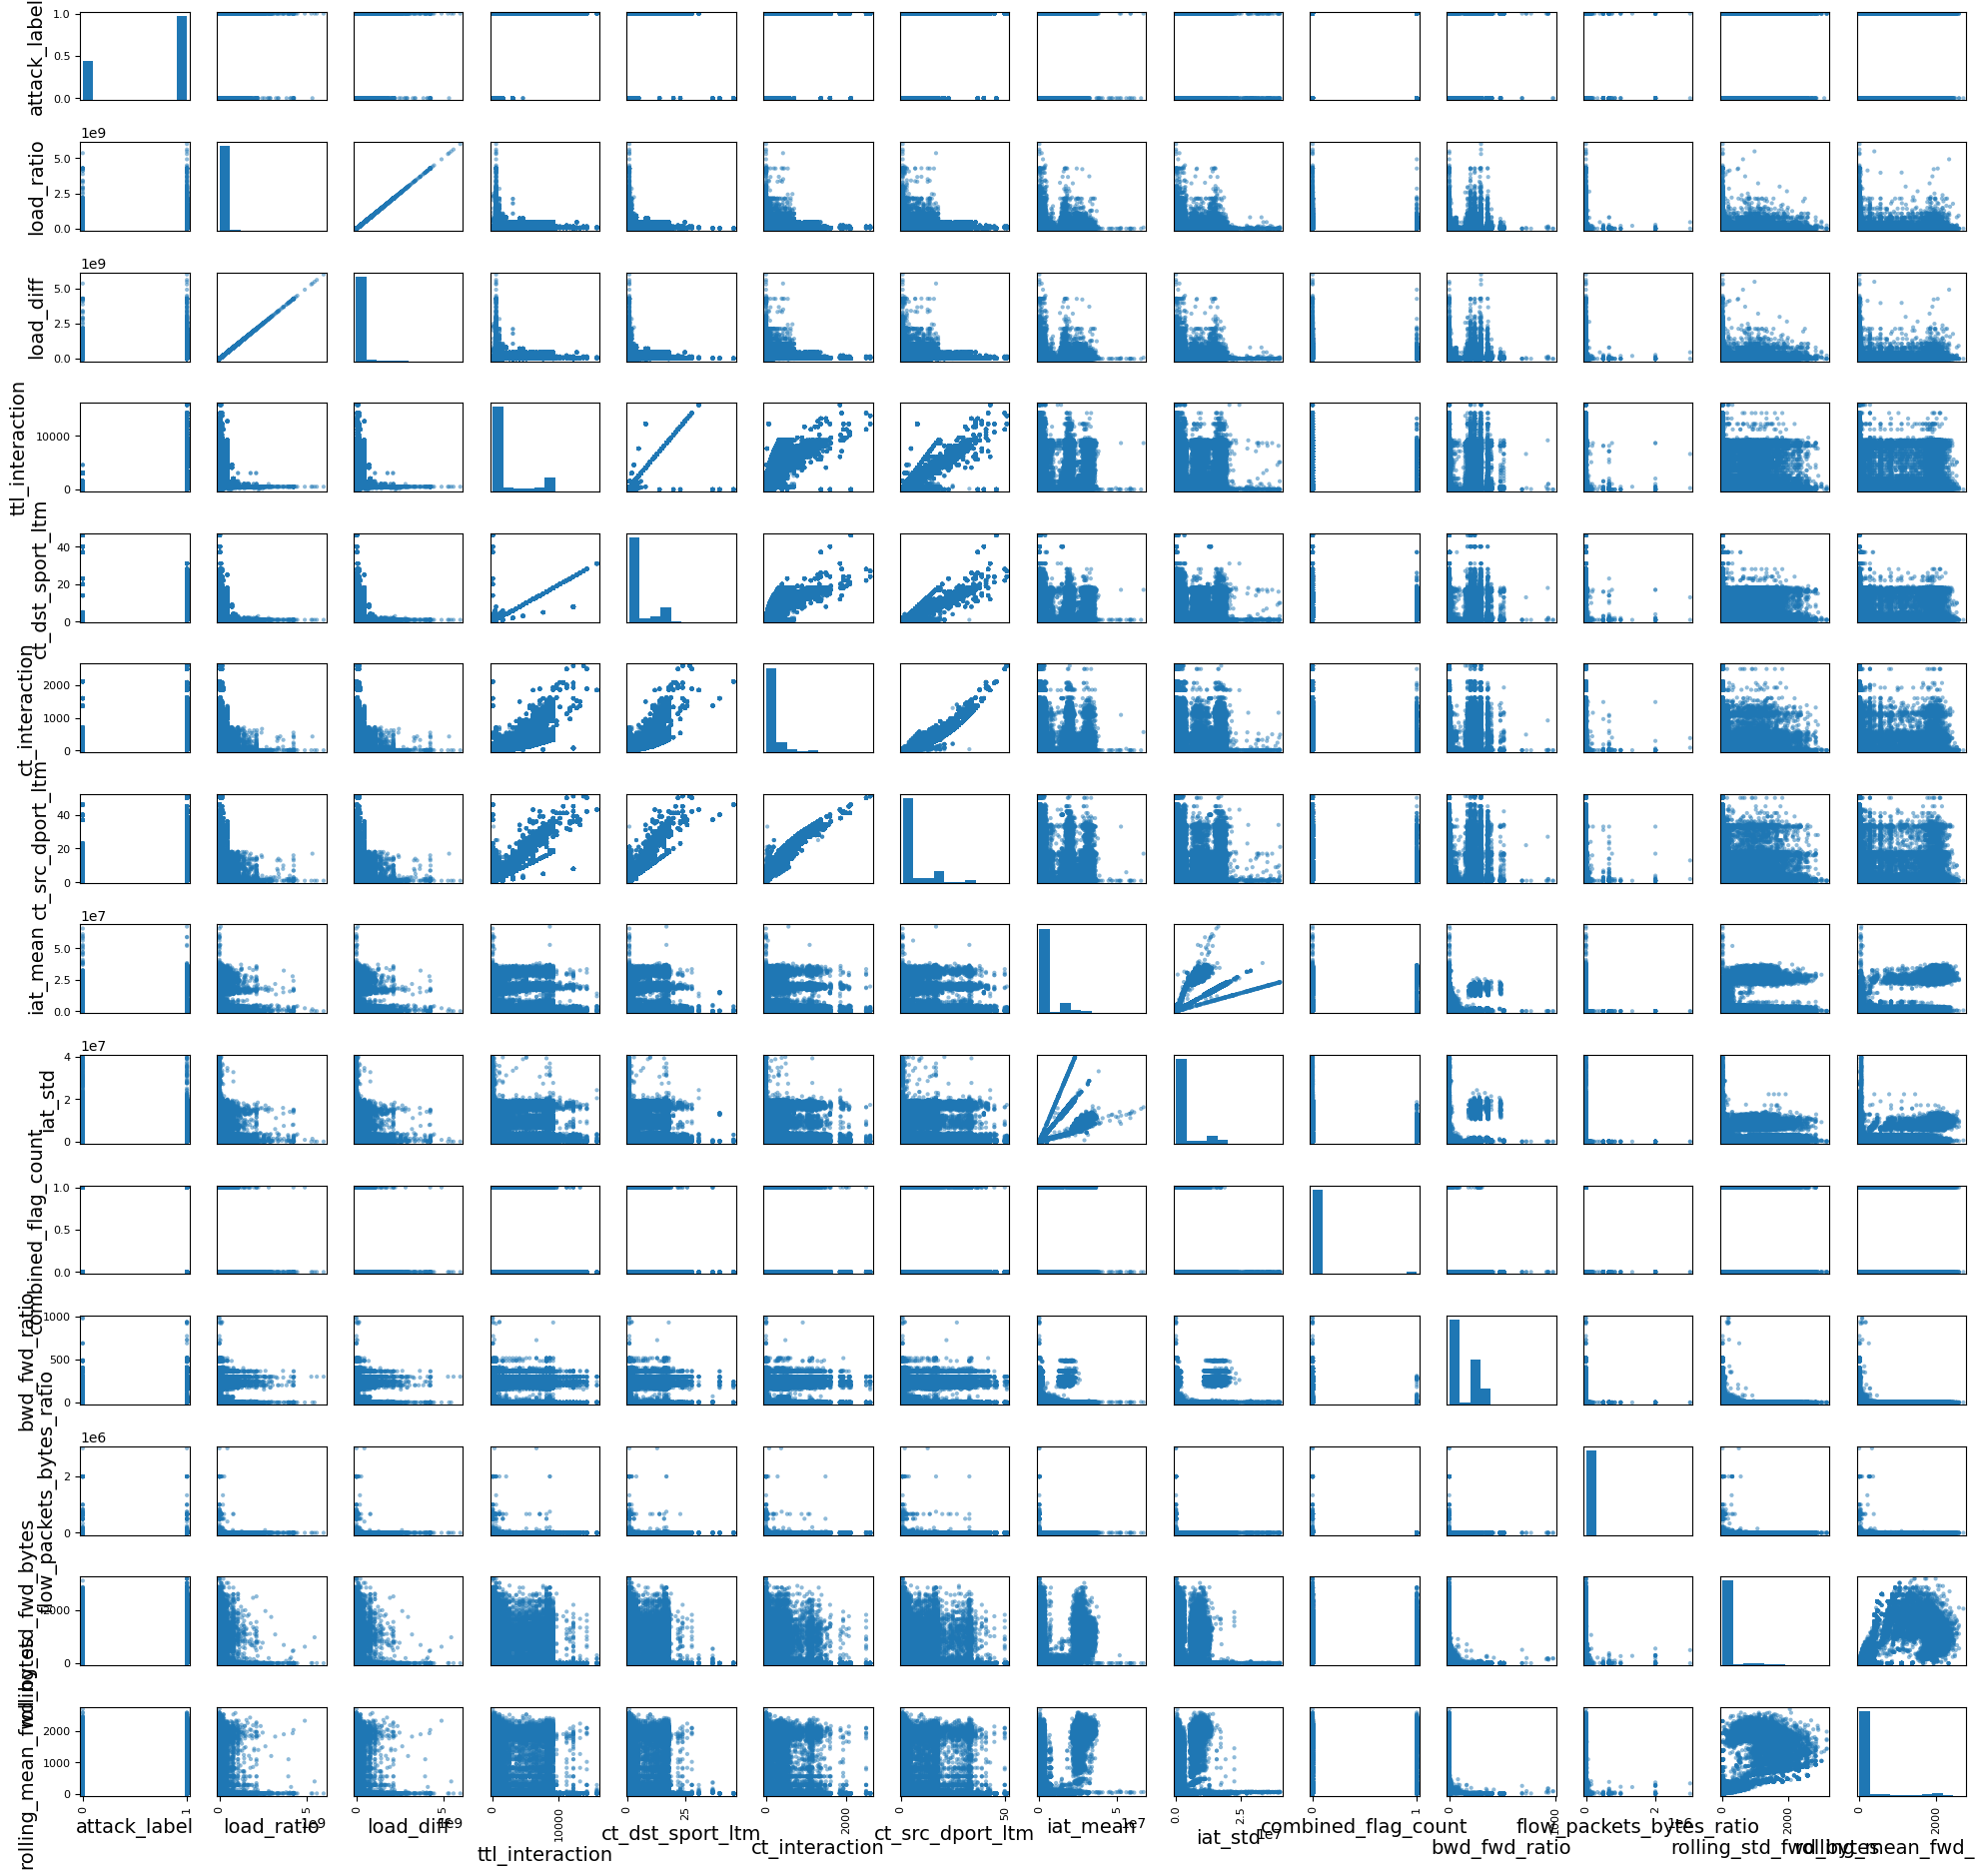

In [95]:
scatter_matrix(df_visuals[['attack_label', 'load_ratio', 'load_diff', 'ttl_interaction', 'ct_dst_sport_ltm', 'ct_interaction', 'ct_src_dport_ltm', 'iat_mean', 'iat_std', 'combined_flag_count', 'bwd_fwd_ratio', 'flow_packets_bytes_ratio', 'rolling_std_fwd_bytes', 'rolling_mean_fwd_bytes']], figsize=(20, 19))
save_fig('scatter plot of new features with attack label')
plt.show()

# 3. Handling Text and categorical attribute


In [96]:
non_numerical_df = df_visuals.select_dtypes(include=["object"])
non_numerical_df

,protocol_type,service,state,attack_cat,flag,sttl_ct_state_cross
0,tcp,-,FIN,Normal,SF,252.0_0.0
1,tcp,-,FIN,Normal,SF,62.0_1.0
2,tcp,-,FIN,Normal,S0,62.0_1.0
3,tcp,ftp,FIN,Normal,SF,62.0_1.0
4,tcp,-,FIN,Normal,SF,254.0_1.0
...,...,...,...,...,...,...
175333,udp,dns,INT,Generic,S0,254.0_2.0
175334,tcp,-,FIN,Shellcode,SF,254.0_1.0
175335,udp,dns,INT,Generic,SF,254.0_2.0
175336,udp,dns,INT,Generic,SF,254.0_2.0


In [97]:
non_numerical_df["attack_cat"].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [98]:
non_numerical_df["protocol_type"].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [99]:
non_numerical_df["service"].unique()

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [100]:
non_numerical_df["state"].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no'],
      dtype=object)

In [101]:
non_numerical_df["flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTO', 'RSTR', 'S1', 'SH', 'S2', 'OTH',
       'RSTOS0', 'S3'], dtype=object)

In [102]:
non_numerical_df["sttl_ct_state_cross"].unique()

array(['252.0_0.0', '62.0_1.0', '254.0_1.0', '254.0_2.0', '62.0_3.0',
       '0.0_0.0', '0.0_2.0', '1.0_0.0', '31.0_0.0', '63.0_0.0',
       '254.0_0.0', '64.0_0.0', '60.0_0.0', '29.0_0.0', '255.0_0.0',
       '254.0_6.0', '62.0_2.0', '62.0_0.0'], dtype=object)

In [103]:
attack_cat = non_numerical_df[["attack_cat"]]
protocol_cat = non_numerical_df[["protocol_type"]]
service_cat = non_numerical_df[["service"]]
state_cat = non_numerical_df[["state"]]
flag_cat = non_numerical_df[["flag"]]
sttl_cat = non_numerical_df[["sttl_ct_state_cross"]]

In [104]:



from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Columns for OneHot Encoding
one_hot_columns = ["attack_cat", "protocol_type", "service", "flag"]

# Columns for Label Encoding
label_columns = ["state", "sttl_ct_state_cross"]

# OneHotEncoder for nominal categorical features
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)

# Apply OneHotEncoder to the one-hot columns
column_transformer = ColumnTransformer(
    transformers=[("onehot", one_hot_encoder, one_hot_columns)],
    remainder="passthrough",  # Keep other columns unchanged
)

# Transform data with OneHotEncoder and convert to a DataFrame
df_onehot_encoded = column_transformer.fit_transform(df_visuals)
df_onehot_encoded = pd.DataFrame(
    df_onehot_encoded, columns=column_transformer.get_feature_names_out()
)

# Apply Label Encoding individually to each label column and add to DataFrame
df_encoded = df_onehot_encoded.copy()  # Start with the one-hot encoded data
for col in label_columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_visuals[col])

# Display the final encoded DataFrame
df_encoded

,onehot__attack_cat_Backdoor,onehot__attack_cat_DoS,onehot__attack_cat_Exploits,onehot__attack_cat_Fuzzers,onehot__attack_cat_Generic,onehot__attack_cat_Normal,onehot__attack_cat_Reconnaissance,onehot__attack_cat_Shellcode,onehot__attack_cat_Worms,onehot__protocol_type_a/n,...,remainder__iat_std,remainder__combined_flag_count,remainder__bwd_fwd_ratio,remainder__flow_packets_bytes_ratio,remainder__rolling_mean_fwd_bytes,remainder__rolling_std_fwd_bytes,remainder__sttl_binned,remainder__sttl_ct_state_cross,state,sttl_ct_state_cross
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.166667,NaN,NaN,1,252.0_0.0,2,3
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.857143,0.166665,NaN,NaN,1,62.0_1.0,2,13
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.857143,0.166666,NaN,NaN,1,62.0_1.0,2,13
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.857143,0.166666,NaN,NaN,1,62.0_1.0,2,13
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.166667,6.0,0.0,1,254.0_1.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.739515,0.0,0.0,136363.6364,62.873333,193.93134,1,254.0_2.0,3,6
175334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.241935,0.014493,13.373333,4.962943,1,254.0_1.0,2,5
175335,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13547423.154951,0.0,1.682203,0.008286,28.906667,7.97627,1,254.0_2.0,3,6
175336,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.494118,0.006756,44.533333,7.607014,1,254.0_2.0,3,6


In [105]:
df_encoded.dropna(inplace=True)

# 4 Feature Scaling


In [106]:
df_encoded.reset_index(inplace=True, drop=True)

In [107]:
df_encoded = df_encoded.apply(pd.to_numeric, errors="coerce")

In [108]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler,
)

# Initialize scalers
standard_scaler = StandardScaler()


minmax_scaler = MinMaxScaler()


robust_scaler = RobustScaler()


maxabs_scaler = MaxAbsScaler()


# Fit and transform using each scaler
standard_scaled_df = pd.DataFrame(
    standard_scaler.fit_transform(df_encoded), columns=df_encoded.columns
)
minmax_scaled_df = pd.DataFrame(
    minmax_scaler.fit_transform(df_encoded), columns=df_encoded.columns
)
robust_scaled_df = pd.DataFrame(
    robust_scaler.fit_transform(df_encoded), columns=df_encoded.columns
)
maxabs_scaled_df = pd.DataFrame(
    maxabs_scaler.fit_transform(df_encoded), columns=df_encoded.columns
)



# Optionally, reset the index if needed
standard_scaled_df.reset_index(drop=True, inplace=True)
minmax_scaled_df.reset_index(drop=True, inplace=True)
robust_scaled_df.reset_index(drop=True, inplace=True)
maxabs_scaled_df.reset_index(drop=True, inplace=True)


# Print shapes to confirm scaling
print("Standard Scaled DataFrame shape:", standard_scaled_df.shape)
print("Min-Max Scaled DataFrame shape:", minmax_scaled_df.shape)
print("Robust Scaled DataFrame shape:", robust_scaled_df.shape)
print("MaxAbs Scaled DataFrame shape:", maxabs_scaled_df.shape)

C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1217: R

Standard Scaled DataFrame shape: (175317, 327)
Min-Max Scaled DataFrame shape: (175317, 327)
Robust Scaled DataFrame shape: (175317, 327)
MaxAbs Scaled DataFrame shape: (175317, 327)


In [109]:
standard_scaled_df_mod = standard_scaled_df.dropna(axis=1)
standard_scaled_df_mod

,onehot__attack_cat_Backdoor,onehot__attack_cat_DoS,onehot__attack_cat_Exploits,onehot__attack_cat_Fuzzers,onehot__attack_cat_Generic,onehot__attack_cat_Normal,onehot__attack_cat_Reconnaissance,onehot__attack_cat_Shellcode,onehot__attack_cat_Worms,onehot__protocol_type_a/n,...,remainder__iat_mean,remainder__iat_std,remainder__combined_flag_count,remainder__bwd_fwd_ratio,remainder__flow_packets_bytes_ratio,remainder__rolling_mean_fwd_bytes,remainder__rolling_std_fwd_bytes,remainder__sttl_binned,state,sttl_ct_state_cross
0,-0.100296,-0.274241,-0.485056,-0.340171,-0.543667,1.460004,-0.252287,-0.080651,-0.027241,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.843376,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
1,-0.100296,-0.274241,-0.485056,-0.340171,-0.543667,1.460004,-0.252287,-0.080651,-0.027241,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.843376,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
2,-0.100296,-0.274241,-0.485056,-0.340171,-0.543667,1.460004,-0.252287,-0.080651,-0.027241,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.843376,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
3,-0.100296,-0.274241,-0.485056,-0.340171,-0.543667,1.460004,-0.252287,-0.080651,-0.027241,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.836797,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
4,-0.100296,-0.274241,-0.485056,-0.340171,-0.543667,1.460004,-0.252287,-0.080651,-0.027241,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.843376,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175312,-0.100296,-0.274241,-0.485056,-0.340171,1.839362,-0.684930,-0.252287,-0.080651,-0.027241,-0.02389,...,-0.556712,-0.577812,-0.181799,-0.843376,3.766643,-0.223330,0.231323,0.566844,0.742892,-0.485708
175313,-0.100296,-0.274241,-0.485056,-0.340171,-0.543667,-0.684930,-0.252287,12.399072,-0.027241,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.833843,-0.035105,-0.325117,-0.295113,0.566844,-0.409229,-0.844515
175314,-0.100296,-0.274241,-0.485056,-0.340171,1.839362,-0.684930,-0.252287,-0.080651,-0.027241,-0.02389,...,0.790491,2.137481,-0.181799,-0.830464,-0.035105,-0.293176,-0.286719,0.566844,0.742892,-0.485708
175315,-0.100296,-0.274241,-0.485056,-0.340171,1.839362,-0.684930,-0.252287,-0.080651,-0.027241,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.824231,-0.035105,-0.261043,-0.287747,0.566844,0.742892,-0.485708


In [110]:
features = standard_scaled_df_mod.columns
features = features.drop(
    [
        "remainder__attack_label",
        "onehot__attack_cat_Backdoor",
        "onehot__attack_cat_DoS",
        "onehot__attack_cat_Exploits",
        "onehot__attack_cat_Fuzzers",
        "onehot__attack_cat_Generic",
        "onehot__attack_cat_Normal",
        "onehot__attack_cat_Reconnaissance",
        "onehot__attack_cat_Shellcode",
        "onehot__attack_cat_Worms",
    ]
)

In [111]:
y_true = standard_scaled_df_mod["remainder__attack_label"]
y_true_adjusted = y_true.apply(lambda x: 1 if x < 0 else 0)

In [112]:
y_true_adjusted.value_counts()

remainder__attack_label
0    119334
1     55983
Name: count, dtype: int64

In [113]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest, RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_recall_fscore_support, f1_score


# iso_forest = IsolationForest(
#     random_state=24, contamination=0.1, max_samples=500, n_estimators=200
# )

In [114]:
from sklearn.feature_selection import (
    SelectKBest,
    mutual_info_regression,
    RFE,
    RFECV,
    chi2,
)

In [115]:
# kbest = SelectKBest(chi2, k=200)
# x_new = kbest.fit_transform(standard_scaled_df_mod[features], standard_scaled_df_mod["remainder__attack_label"])

In [116]:
# params = {
#     "contamination": [0.1, 0.2, 0.3, 0.4, 0.5],
#     "max_samples": [400, 500],
#     "n_estimators": [200, 300],
# }

In [117]:
# f1 = make_scorer(f1_score, average="macro")

In [118]:
# gs = GridSearchCV(iso_forest, params, cv=5, verbose=1, scoring=f1)
# gs.fit(standard_scaled_df_mod[features], y_true_adjusted)

In [119]:
# iso_forest.fit(standard_scaled_df_mod[features])
# print(iso_forest.get_params())

In [120]:
# standard_scaled_df_mod["scores"] = iso_forest.decision_function(
#     standard_scaled_df_mod[features]
# )



# standard_scaled_df_mod["anomaly_score"] = iso_forest.predict(
#     standard_scaled_df_mod[features]
# )


# standard_scaled_df_mod[standard_scaled_df_mod["anomaly_score"] == -1].head()

In [121]:
# gs.best_params_

In [122]:
# gs.best_score_

In [123]:
# pd.DataFrame(gs.cv_results_)

In [124]:
# y_pred = standard_scaled_df_mod["anomaly_score"]
# y_pred_adjusted = y_pred.map({-1: 0, 1: 1})

In [125]:
# y_pred_adjusted.value_counts()

In [127]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [128]:
x_train, x_test, y_train, y_test = train_test_split(
    standard_scaled_df_mod[features],
    y_true_adjusted,
    test_size=0.3,
    random_state=24,
    stratify=y_true_adjusted,
)

In [129]:
xgb = XGBClassifier()

In [130]:
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

In [133]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     35801
           1       0.96      0.93      0.95     16795

    accuracy                           0.97     52596
   macro avg       0.96      0.96      0.96     52596
weighted avg       0.97      0.97      0.97     52596



### Attack Cat

This section includes modifications to predict `attack_cat` as the target.
As a result, I had to re-encode `attack_cat` with `LabelEncoder`


In [134]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Columns for OneHot Encoding
one_hot_columns = ["protocol_type", "service", "flag"]

# Columns for Label Encoding
label_columns = ["attack_cat", "state", "sttl_ct_state_cross"]

# OneHotEncoder for nominal categorical features
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)

# Apply OneHotEncoder to the one-hot columns
column_transformer = ColumnTransformer(
    transformers=[("onehot", one_hot_encoder, one_hot_columns)],
    remainder="passthrough",  # Keep other columns unchanged
)

# Transform data with OneHotEncoder and convert to a DataFrame
df_onehot_encoded = column_transformer.fit_transform(df_visuals)
df_onehot_encoded = pd.DataFrame(
    df_onehot_encoded, columns=column_transformer.get_feature_names_out()
)

# Apply Label Encoding individually to each label column and add to DataFrame
df_encoded = df_onehot_encoded.copy()  # Start with the one-hot encoded data
for col in label_columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_visuals[col])

# Display the final encoded DataFrame
df_encoded

,onehot__protocol_type_a/n,onehot__protocol_type_aes-sp3-d,onehot__protocol_type_any,onehot__protocol_type_argus,onehot__protocol_type_aris,onehot__protocol_type_arp,onehot__protocol_type_ax.25,onehot__protocol_type_bbn-rcc,onehot__protocol_type_bna,onehot__protocol_type_br-sat-mon,...,remainder__combined_flag_count,remainder__bwd_fwd_ratio,remainder__flow_packets_bytes_ratio,remainder__rolling_mean_fwd_bytes,remainder__rolling_std_fwd_bytes,remainder__sttl_binned,remainder__sttl_ct_state_cross,attack_cat,state,sttl_ct_state_cross
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,NaN,NaN,1,252.0_0.0,6,2,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.857143,0.166665,NaN,NaN,1,62.0_1.0,6,2,13
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.857143,0.166666,NaN,NaN,1,62.0_1.0,6,2,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.857143,0.166666,NaN,NaN,1,62.0_1.0,6,2,13
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,6.0,0.0,1,254.0_1.0,6,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,136363.6364,62.873333,193.93134,1,254.0_2.0,5,3,6
175334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.241935,0.014493,13.373333,4.962943,1,254.0_1.0,8,2,5
175335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.682203,0.008286,28.906667,7.97627,1,254.0_2.0,5,3,6
175336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.494118,0.006756,44.533333,7.607014,1,254.0_2.0,5,3,6


In [135]:
df_encoded.dropna(inplace=True)

In [136]:
df_encoded.reset_index(inplace=True, drop=True)

In [137]:
df_encoded = df_encoded.apply(pd.to_numeric, errors="coerce")

In [138]:
x = df_encoded.drop(["remainder__attack_label", "attack_cat"], axis=1)
y = df_encoded["attack_cat"]
y

0         6
1         6
2         6
3         6
4         6
         ..
175312    5
175313    8
175314    5
175315    5
175316    5
Name: attack_cat, Length: 175317, dtype: int32

In [139]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler,
)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()


# Fit and transform using each scaler
standard_scaled_df = pd.DataFrame(
    standard_scaler.fit_transform(x), columns=x.columns
)
minmax_scaled_df = pd.DataFrame(
    minmax_scaler.fit_transform(df_encoded), columns=df_encoded.columns
)
robust_scaled_df = pd.DataFrame(
    robust_scaler.fit_transform(df_encoded), columns=df_encoded.columns
)
maxabs_scaled_df = pd.DataFrame(
    maxabs_scaler.fit_transform(df_encoded), columns=df_encoded.columns
)


# Optionally, reset the index if needed
standard_scaled_df.reset_index(drop=True, inplace=True)
minmax_scaled_df.reset_index(drop=True, inplace=True)
robust_scaled_df.reset_index(drop=True, inplace=True)
maxabs_scaled_df.reset_index(drop=True, inplace=True)


# Print shapes to confirm scaling
print("Standard Scaled DataFrame shape:", standard_scaled_df.shape)
print("Min-Max Scaled DataFrame shape:", minmax_scaled_df.shape)
print("Robust Scaled DataFrame shape:", robust_scaled_df.shape)
print("MaxAbs Scaled DataFrame shape:", maxabs_scaled_df.shape)

C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\hp\anaconda3\New folder\Lib\site-packages\sklearn\utils\_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1217: R

Standard Scaled DataFrame shape: (175317, 318)
Min-Max Scaled DataFrame shape: (175317, 320)
Robust Scaled DataFrame shape: (175317, 320)
MaxAbs Scaled DataFrame shape: (175317, 320)


In [140]:
standard_scaled_df_mod = standard_scaled_df.dropna(axis=1)
standard_scaled_df_mod

,onehot__protocol_type_a/n,onehot__protocol_type_aes-sp3-d,onehot__protocol_type_any,onehot__protocol_type_argus,onehot__protocol_type_aris,onehot__protocol_type_arp,onehot__protocol_type_ax.25,onehot__protocol_type_bbn-rcc,onehot__protocol_type_bna,onehot__protocol_type_br-sat-mon,...,remainder__iat_mean,remainder__iat_std,remainder__combined_flag_count,remainder__bwd_fwd_ratio,remainder__flow_packets_bytes_ratio,remainder__rolling_mean_fwd_bytes,remainder__rolling_std_fwd_bytes,remainder__sttl_binned,state,sttl_ct_state_cross
0,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.843376,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
1,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.843376,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
2,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.843376,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
3,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.836797,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
4,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.843376,-0.035100,-0.340278,-0.308939,0.566844,-0.409229,-0.844515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175312,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,-0.556712,-0.577812,-0.181799,-0.843376,3.766643,-0.223330,0.231323,0.566844,0.742892,-0.485708
175313,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.833843,-0.035105,-0.325117,-0.295113,0.566844,-0.409229,-0.844515
175314,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,0.790491,2.137481,-0.181799,-0.830464,-0.035105,-0.293176,-0.286719,0.566844,0.742892,-0.485708
175315,-0.02389,-0.02389,-0.041402,-0.02365,-0.02389,-0.128755,-0.02389,-0.02365,-0.02389,-0.02389,...,-0.556713,-0.577813,-0.181799,-0.824231,-0.035105,-0.261043,-0.287747,0.566844,0.742892,-0.485708


In [141]:
y.value_counts()

attack_cat
6    55983
5    39997
3    33392
4    18183
2    12263
7    10491
0     1999
1     1746
8     1133
9      130
Name: count, dtype: int64

In [142]:
x_train, x_test, y_train, y_test = train_test_split(
    standard_scaled_df_mod,
    y,
    test_size=0.3,
    random_state=24,
    stratify=y,
)

In [143]:
xgb2 = XGBClassifier()

In [144]:
xgb2.fit(x_train, y_train)
xgb2_pred = xgb2.predict(x_test)

In [145]:
print(classification_report(y_test, xgb2_pred))

              precision    recall  f1-score   support

           0       0.66      0.15      0.24       600
           1       0.73      0.14      0.24       524
           2       0.40      0.18      0.25      3679
           3       0.64      0.89      0.74     10018
           4       0.80      0.77      0.79      5455
           5       1.00      0.98      0.99     11999
           6       0.95      0.94      0.95     16795
           7       0.91      0.75      0.82      3147
           8       0.66      0.67      0.67       340
           9       0.48      0.28      0.35        39

    accuracy                           0.84     52596
   macro avg       0.72      0.58      0.60     52596
weighted avg       0.84      0.84      0.83     52596



In [146]:
import pickle

with open("attack_label_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

with open("attack_cat_model.pkl", "wb") as f:
    pickle.dump(xgb2, f)

In [147]:
with open("attack_label_model.pkl", "rb") as f:
    model1 = pickle.load(f)

with open("attack_cat_model.pkl", "rb") as f:
    model2 = pickle.load(f)
